# Grab select Census Tracts

In [1]:
#Import the GIS object and authenticate
from arcgis import GIS
gis = GIS('pro')

In [9]:
#Use the 'content' helper to search for feature layers with keyword Census
results = gis.content.search(query='census  tract',item_type='Feature Layer',outside_org=True)
results

[<Item title:"USA Block Groups" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"California Census Tract Boundaries" type:Feature Layer Collection owner:Ferrar@FracTracker.org>,
 <Item title:"CDC’s Social Vulnerability Index (SVI) – 2014 overall SVI, census tract level" type:Feature Layer Collection owner:data_cdc>,
 <Item title:"USA Tracts" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"USA Counties" type:Feature Layer Collection owner:esri_dm>,
 <Item title:"LA County Supervisorial District" type:Feature Layer Collection owner:lacounty_isd>,
 <Item title:"USA Census Tracts" type:Feature Layer Collection owner:sfoss_startups>,
 <Item title:"Dissemination Areas" type:Feature Layer Collection owner:cmxadmin>,
 <Item title:"CRA 2015A Census Tracts" type:Feature Layer Collection owner:rpminfonet>,
 <Item title:"CDC’s Social Vulnerability Index (SVI) – 2014 socioeconomic SVI, county level" type:Feature Layer Collection owner:data_cdc>]

<Item title:"USA Tracts" type:Feature Layer Collection owner:esri_dm>
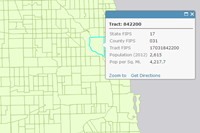

In [10]:
#Have a look at the 4th result
results[3]

In [13]:
#Save it as an arcgis "item" object
tractsItem = results[3]
type(tractsItem)

arcgis.gis.Item

In [20]:
#Get the layer from the item
tractsLyr = tractsItem.layers[0]
type(tractsLyr)

arcgis.features.layer.FeatureLayer

Query the feature layer: <br>
https://developers.arcgis.com/python/guide/working-with-feature-layers-and-features/#Querying-feature-layers

In [25]:
for f in tractsLyr.properties.fields:
    print(f['name'])

OBJECTID_1
ObjectID
STATE_FIPS
CNTY_FIPS
STCOFIPS
TRACT
FIPS
POP2010
POP10_SQMI
POP2012
POP12_SQMI
WHITE
BLACK
AMERI_ES
ASIAN
HAWN_PI
HISPANIC
OTHER
MULT_RACE
MALES
FEMALES
AGE_UNDER5
AGE_5_9
AGE_10_14
AGE_15_19
AGE_20_24
AGE_25_34
AGE_35_44
AGE_45_54
AGE_55_64
AGE_65_74
AGE_75_84
AGE_85_UP
MED_AGE
MED_AGE_M
MED_AGE_F
HOUSEHOLDS
AVE_HH_SZ
HSEHLD_1_M
HSEHLD_1_F
MARHH_CHD
MARHH_NO_C
MHH_CHILD
FHH_CHILD
FAMILIES
AVE_FAM_SZ
HSE_UNITS
VACANT
OWNER_OCC
RENTER_OCC
SQMI


In [28]:
query_result = tractsLyr.query("FIPS LIKE '37063%'")
len(query_result)

60

In [59]:
#View results as a spatially enabled data frame
sdf = query_result.sdf
sdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP2010,POP2012,RENTER_OCC,SHAPE,SQMI,STATE_FIPS,STCOFIPS,TRACT,VACANT,WHITE
0,232,243,191,510,460,466,299,233,160,100,...,3152,3130,456,"{""rings"": [[[-78.8875150111089, 36.03652607561...",1.31,37,37063,000101,127,981
1,226,284,316,879,682,493,439,297,191,196,...,4535,4419,1101,"{""rings"": [[[-78.9062140604305, 36.04292494892...",1.53,37,37063,000102,179,1939
2,114,127,210,611,563,439,296,177,102,65,...,2946,3155,662,"{""rings"": [[[-78.880122002928, 36.013835942075...",1.17,37,37063,000200,200,1369
3,121,114,271,600,376,277,249,158,84,32,...,2504,2604,759,"{""rings"": [[[-78.9000969815904, 36.01716198573...",0.55,37,37063,000301,130,1042
4,143,121,280,835,625,417,322,219,116,64,...,3426,3517,881,"{""rings"": [[[-78.8956800297096, 36.01690994174...",0.67,37,37063,000302,124,2249


In [62]:
sdf['SHAPE'][0]['rings']

[[[-78.8875150111089, 36.0365260756179],
  [-78.8875270458365, 36.0354169489331],
  [-78.8874040320704, 36.0354169489331],
  [-78.8869779980361, 36.0354169489331],
  [-78.8857980047741, 36.0354099297246],
  [-78.8834950118853, 36.0352449643837],
  [-78.8836740165426, 36.0341620781174],
  [-78.8836740165426, 36.0340810159262],
  [-78.8836629854584, 36.0340230195468],
  [-78.8836399205459, 36.0339929345263],
  [-78.8836160201632, 36.0339610112917],
  [-78.8835479945443, 36.033927918039],
  [-78.8833549505705, 36.0339070258886],
  [-78.8825710735961, 36.033867079802],
  [-78.8823429308815, 36.0338440148894],
  [-78.8804579500743, 36.0336599956124],
  [-78.8780700512918, 36.0334149717236],
  [-78.8779819698919, 36.0334119634913],
  [-78.878156963573, 36.0324049575228],
  [-78.8782350166327, 36.0319490057421],
  [-78.8782679426114, 36.0317529535361],
  [-78.8782749627193, 36.0315570677046],
  [-78.8782570788011, 36.0314220201102],
  [-78.8782129544642, 36.0312939926237],
  [-78.878136070523

In [63]:
#Convert rings to polygons
sdf['geometry'] = sdf['SHAPE'].apply(lambda x: x['rings'])
sdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP2012,RENTER_OCC,SHAPE,SQMI,STATE_FIPS,STCOFIPS,TRACT,VACANT,WHITE,geometry
0,232,243,191,510,460,466,299,233,160,100,...,3130,456,"{""rings"": [[[-78.8875150111089, 36.03652607561...",1.31,37,37063,000101,127,981,"[[[-78.8875150111089, 36.0365260756179], [-78...."
1,226,284,316,879,682,493,439,297,191,196,...,4419,1101,"{""rings"": [[[-78.9062140604305, 36.04292494892...",1.53,37,37063,000102,179,1939,"[[[-78.9062140604305, 36.0429249489273], [-78...."
2,114,127,210,611,563,439,296,177,102,65,...,3155,662,"{""rings"": [[[-78.880122002928, 36.013835942075...",1.17,37,37063,000200,200,1369,"[[[-78.880122002928, 36.0138359420751], [-78.8..."
3,121,114,271,600,376,277,249,158,84,32,...,2604,759,"{""rings"": [[[-78.9000969815904, 36.01716198573...",0.55,37,37063,000301,130,1042,"[[[-78.9000969815904, 36.0171619857371], [-78...."
4,143,121,280,835,625,417,322,219,116,64,...,3517,881,"{""rings"": [[[-78.8956800297096, 36.01690994174...",0.67,37,37063,000302,124,2249,"[[[-78.8956800297096, 36.0169099417405], [-78...."


In [69]:
from shapely.geometry import Polygon
from shapely.geometry import LinearRing
def polyFromRing(ring):
    r = LinearRing(ring)
    s = Polygon(r)
    return r

In [71]:
#Apply the function to all rows
sdf['geometry']=sdf['SHAPE'].apply(lambda x: Polygon(x.rings[0]))

In [37]:
import geopandas as gpd

In [74]:
#Rename shape field to 'geometry'
sdf.drop('SHAPE',axis=1,inplace=True)

In [ ]:
#Dropy

In [75]:
gdf=gpd.GeoDataFrame(sdf)
gdf.head()

,AGE_10_14,AGE_15_19,AGE_20_24,AGE_25_34,AGE_35_44,AGE_45_54,AGE_55_64,AGE_5_9,AGE_65_74,AGE_75_84,...,POP2010,POP2012,RENTER_OCC,SQMI,STATE_FIPS,STCOFIPS,TRACT,VACANT,WHITE,geometry
0,232,243,191,510,460,466,299,233,160,100,...,3152,3130,456,1.31,37,37063,000101,127,981,"POLYGON ((-78.8875150111089 36.0365260756179, ..."
1,226,284,316,879,682,493,439,297,191,196,...,4535,4419,1101,1.53,37,37063,000102,179,1939,"POLYGON ((-78.9062140604305 36.0429249489273, ..."
2,114,127,210,611,563,439,296,177,102,65,...,2946,3155,662,1.17,37,37063,000200,200,1369,"POLYGON ((-78.880122002928 36.0138359420751, -..."
3,121,114,271,600,376,277,249,158,84,32,...,2504,2604,759,0.55,37,37063,000301,130,1042,"POLYGON ((-78.90009698159039 36.0171619857371,..."
4,143,121,280,835,625,417,322,219,116,64,...,3426,3517,881,0.67,37,37063,000302,124,2249,"POLYGON ((-78.8956800297096 36.0169099417405, ..."


In [76]:
#Export to a shapefile
gdf.to_file(driver='ESRI Shapefile',filename='foo.shp')